In [ ]:
pip install --upgrade matplotlib


ERROR: Operation cancelled by user


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**<h2> Projeto Web-Scraping Dados da Libertadores Wikipedia </h2>**

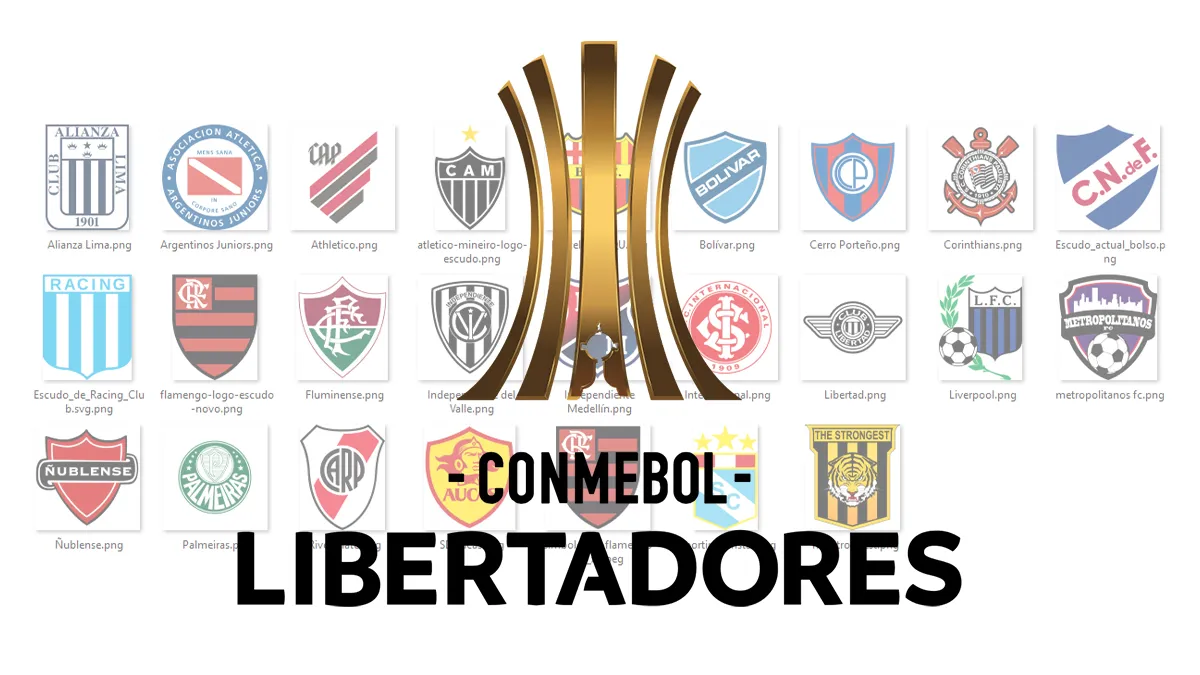

A ideia do projeto é realizar web-scraping com dados das tabelas do libertadores presentes na página do wikipedia sobre a competição.

Separei o projeto em 3 etapas:

1º Extração dos dados

2º Manipulação e Limpeza

3º Criação dos gráficos


**<h2> Raspagem </h2>**

<h3> O código abaixo realizar a raspagem da 1º tabela presente no site utilizando a url e a biblioteca BeatifulSoup. A intenção é pegar dos dados da seguinta tabela presente no site: </h3>

<h3> Na análise poderemos conhecer </h3>

* Times que mais **venceram** a competição;
* Times brasileiros com mais **títulos**;
* Times brasileiros com mais **participações**;
* Times brasileiros com mais **vitórias**.

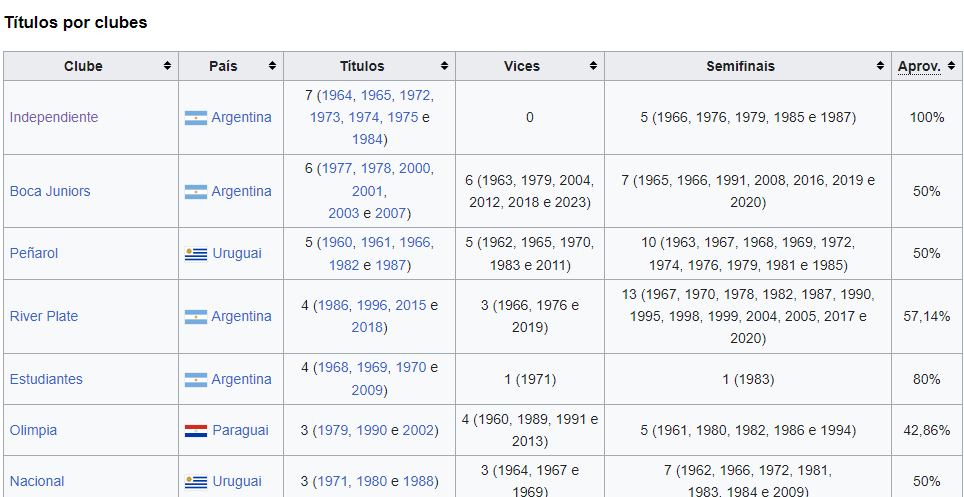

<h3> Antes de começarmos a análise, vou deixar 2 funções prontas para plotar os gráficos. Nesse caso criarei uma função para plotar gráficos de barras horizontais e outra função para plotar gráfico de barras verticais. </h3>

<h3> É importante fazer essa distinção pois adicionar legendas em barras horizontais e verticais tem processos diferentes. </h3>

**Função para gráfico de barras verticais(bar)**

In [ ]:
def grafico_barras(tabela, x, y, titulo, valor):
    print(valor)
    fig, ax = plt.subplots(figsize=(8, 6))
    tabela_ordenada = tabela.sort_values(by=x, ascending=False)[:valor]

    # sns.color_palette("flare", as_cmap=True)

    sns.barplot(x=x, y=y, data=tabela_ordenada, orient='h', ax=ax, palette='Pastel1')
    ax.set_title(titulo, fontsize=12)
    ax.spines[['bottom', 'top', 'right']].set_visible(False)
    ax.set_ylabel('')
    ax.set_xlabel('')

    for index, value in enumerate(tabela_ordenada[x]):
        ax.text(value, index, f'{value:.0f}', ha='left', va='center', fontsize=10, color='black')
    plt.tight_layout()
    plt.show()

**Função para gráfico de barras horizontais(barh)**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL da página da Wikipedia com as tabelas da Libertadores
url = "https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol"

# Fazendo a requisição para a URL
response = requests.get(url)

# Criando o objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrando a tabela no HTML com a classe desejada
table = soup.find_all('table', {'class': 'wikitable'})

# Aqui eu pego as infomações em html da 1º tabela
tabela_wiki = pd.read_html(str(table),header=1)[3]
tabela_wiki

,Pos.,Clube,Pts,J,V,E,D,GP,GC,SG,Unnamed: 10
0,1,São Paulo,2342,1594,697,470,427,2338,1687,+651,NaN
1,2,Internacional,2283,1575,688,444,443,2134,1613,+521,NaN
2,3,Palmeiras,2263,1521,699,420,402,2257,1617,+640,NaN
3,4,Santos,2250,1610,674,454,482,2352,1833,+519,NaN
4,5,Atlético Mineiro,2241,1590,678,439,472,2289,1842,+447,NaN
5,6,Flamengo,2241,1600,677,444,479,2230,1812,+418,NaN
6,7,Corinthians,2237,1577,670,465,442,2062,1638,+424,NaN
7,8,Grêmio,2196,1568,671,430,467,2102,1664,+438,NaN
8,9,Cruzeiro,2133,1519,647,417,455,2166,1710,+456,NaN
9,10,Fluminense,2012,1527,596,419,512,2032,1829,+203,NaN


In [ ]:
tabela_historica = tabela_wiki.dropna(axis = 1, how = 'any')
tabela_historica

,Pos.,Clube,Pts,J,V,E,D,GP,GC,SG
0,1,São Paulo,2342,1594,697,470,427,2338,1687,+651
1,2,Internacional,2283,1575,688,444,443,2134,1613,+521
2,3,Palmeiras,2263,1521,699,420,402,2257,1617,+640
3,4,Santos,2250,1610,674,454,482,2352,1833,+519
4,5,Atlético Mineiro,2241,1590,678,439,472,2289,1842,+447
5,6,Flamengo,2241,1600,677,444,479,2230,1812,+418
6,7,Corinthians,2237,1577,670,465,442,2062,1638,+424
7,8,Grêmio,2196,1568,671,430,467,2102,1664,+438
8,9,Cruzeiro,2133,1519,647,417,455,2166,1710,+456
9,10,Fluminense,2012,1527,596,419,512,2032,1829,+203


In [ ]:
Maiores_pontuacoes = tabela_historica[["Clube", "Pts"]]
Maiores_pontuacoes

,Clube,Pts
0,São Paulo,2342
1,Internacional,2283
2,Palmeiras,2263
3,Santos,2250
4,Atlético Mineiro,2241
5,Flamengo,2241
6,Corinthians,2237
7,Grêmio,2196
8,Cruzeiro,2133
9,Fluminense,2012


-10


<ipython-input-47-4a5947fbda1c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=tabela_ordenada, orient='h', ax=ax, palette='Pastel1')


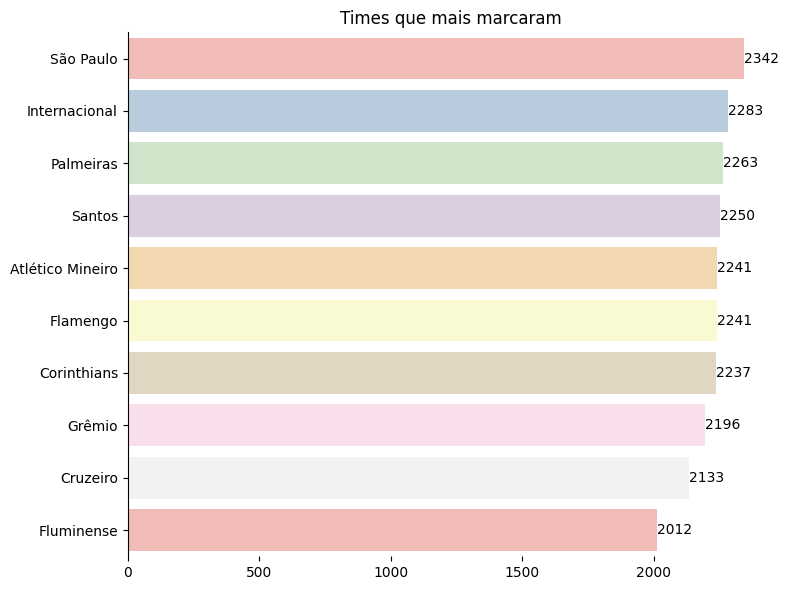

In [ ]:
grafico_barras(Maiores_pontuacoes,'Pts','Clube', "Times que mais marcaram", -10)

**<h3>Já com as informações em mãos, eu transformo os dados em um dataframe para realizar as manipulações e o gráficos necessários.</h3>**

**<h3> Agora eu posso visualizar o dataframe semelhante a tabela do wikipedia. </h3>**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

page = requests.get('https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol').text
soup = BeautifulSoup(page, 'html.parser')

# Target the table by its class
table = soup.find_all('table', class_='wikitable sortable')

# If the table is found, proceed to parse it using pandas.read_html
if table:
  df = pd.read_html(str(table))[2]
  tabela_wiki = pd.DataFrame(df)
  tabela_wiki
else:
  print("Table not found!")


In [ ]:
num_tables = len(pd.read_html(str(table)))
print(f"Número de tabelas encontradas: {num_tables}")


Número de tabelas encontradas: 7


In [ ]:
tabela_wiki[["Clube", "Títulos"]]

,Clube,Títulos
0,Palmeiras,"12 (1960, 1967[nota 5], 1967[nota 3], 1969, 19..."
1,Santos,"8 (1961, 1962, 1963, 1964, 1965, 1968,[nota 3]..."
2,Corinthians,"7 (1990, 1998, 1999, 2005, 2011, 2015 e 2017)"
3,Flamengo,"7 (1980, 1982, 1983, 1992, 2009, 2019 e 2020)"
4,São Paulo,"6 (1977, 1986, 1991, 2006, 2007 e 2008)"
5,Cruzeiro,"4 (1966, 2003, 2013 e 2014)"
6,Vasco da Gama,"4 (1974, 1989, 1997 e 2000)"
7,Fluminense,"4 (1970, 1984, 2010 e 2012)"
8,Internacional,"3 (1975, 1976 e 1979)"
9,Atlético Mineiro,"3 (1937, 1971 e 2021)"


<h3> Agora vem uma parte muito importante. Podemos observar que na coluna títulos temos os valores que cada time conquistou junto dos anos em parenteses. O problema que não é possível realizar gráficos assim, já que está em formato de string a coluna de títulos. </h3>


<h3> Para isso é necessário limpar os parenteses da coluna e transformar em float para ser um dados numerico. A função remove_parentheses tem esse objetivo. </h3>

In [ ]:
import re
# Função para remover o que está entre parênteses e converter para float
remove_parentheses = lambda s: float(re.sub(r'\([^)]*\)', '', s))
# Lendo novamente podemos perceber que os parenteses sumiram e podemos criar o gráfico agora
tabela_wiki["Títulos"] = tabela_wiki["Títulos"].apply(remove_parentheses)

In [ ]:
tabela_wiki.head(10)
top_primeiros = tabela_wiki[["Clube", "Total de vezes no top 4"]]
top_primeiros

,Clube,Total de vezes no top 4
0,Palmeiras,25
1,Santos,20
2,Corinthians,20
3,Flamengo,15
4,São Paulo,20
5,Cruzeiro,18
6,Vasco da Gama,12
7,Fluminense,17
8,Internacional,21
9,Atlético Mineiro,21


<ipython-input-28-6cd4c52513fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=tabela_ordenada, orient='h', ax=ax, palette='Pastel1')


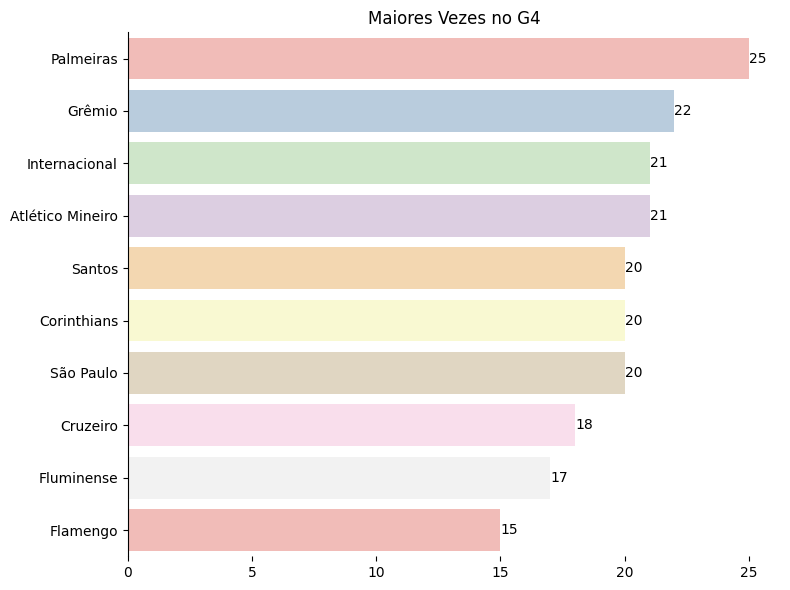

In [ ]:
grafico_barras(top_primeiros, "Total de vezes no top 4", "Clube", "Maiores Vezes no G4", 10)

<h3> Agora estamos próximos de criar os gráficos, para isso criei um novo dataframe apenas com as informações do Clube e Títulos para plotar. Escolhi o head(17) para pegar os 17 primeiros clubes com mais títulos, para incluir o Fluminense último campeão. </h3>

In [ ]:
# Criando um dataframe novo com os dados dos clubes e titulos
top_vencedores = tabela_wiki[["Clube", "Títulos"]].head(17)
top_vencedores

,Clube,Títulos
0,Palmeiras,12.0
1,Santos,8.0
2,Corinthians,7.0
3,Flamengo,7.0
4,São Paulo,6.0
5,Cruzeiro,4.0
6,Vasco da Gama,4.0
7,Fluminense,4.0
8,Internacional,3.0
9,Atlético Mineiro,3.0


<ipython-input-28-6cd4c52513fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=tabela_ordenada, orient='h', ax=ax, palette='Pastel1')


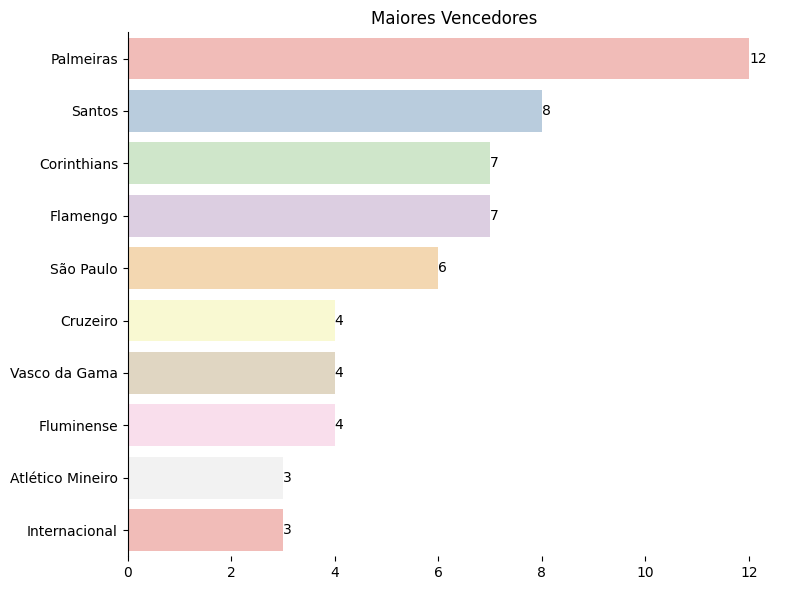

In [ ]:
grafico_barras(top_vencedores, "Títulos", "Clube", "Maiores Vencedores", 10)

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

page = requests.get('https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol').text
soup = BeautifulSoup(page, 'html.parser')

# Target the table by its class
table = soup.find_all('table', class_='wikitable sortable')

# If the table is found, proceed to parse it using pandas.read_html
if table:
  df = pd.read_html(str(table),header=0)[6]
  tabela_wiki = pd.DataFrame(df)
  tabela_wiki
else:
  print("Table not found!")


In [ ]:
tabela_wiki.head(9)

,Nº,Jogador,Posição,Gols,Partidas,Média
0,1,Roberto Dinamite[247],Atacante,190,328,058
1,2,Fred,Atacante,157,339,046
2,3,Romário,Atacante,154,251,061
3,4,Edmundo,Atacante,153,316,048
4,5,Zico,Meia,135,249,054
5,6,Diego Souza,Meia/atacante,132,471,028
6,7,Túlio,Atacante,129,241,054
7,8,Serginho Chulapa,Atacante,127,184,069
8,8,Dadá Maravilha,Atacante,127,278,046


In [ ]:
top_artilheiros = tabela_wiki[["Jogador", "Gols"]][:9]
top_artilheiros

,Jogador,Gols
0,Roberto Dinamite[247],190
1,Fred,157
2,Romário,154
3,Edmundo,153
4,Zico,135
5,Diego Souza,132
6,Túlio,129
7,Serginho Chulapa,127
8,Dadá Maravilha,127


In [ ]:
top_artilheiros['Gols'] = top_artilheiros['Gols'].astype(float)
top_artilheiros

,Jogador,Gols
0,Roberto Dinamite[247],190.0
1,Fred,157.0
2,Romário,154.0
3,Edmundo,153.0
4,Zico,135.0
5,Diego Souza,132.0
6,Túlio,129.0
7,Serginho Chulapa,127.0
8,Dadá Maravilha,127.0


5


<ipython-input-47-4a5947fbda1c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=tabela_ordenada, orient='h', ax=ax, palette='Pastel1')


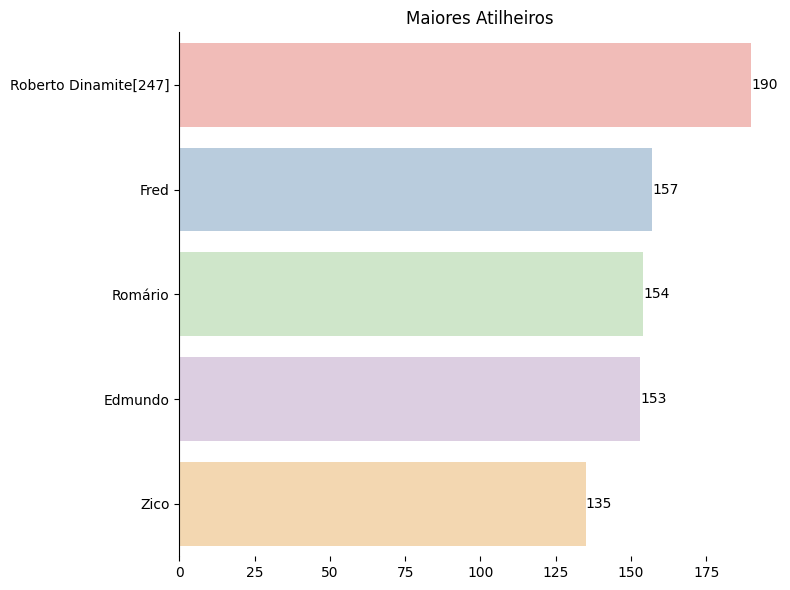

In [ ]:
grafico_barras(top_artilheiros,"Gols", "Jogador", "Maiores Atilheiros", 5)

<h2> Era dos Pontos Corridos A partir de 2003 </h2>

<h3> Durante os 21 anos em que o Campeonato Brasileiro adotou a fórmula de pontos corridos, 44 equipes já participaram. Na tabela abaixo, é possível verificar o desempenho de todas as equipes que disputaram o campeonato desde a primeira edição, em 2003. </h3>